# **Introduction**

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a Principal Component Analysis (PCA) transformation.

Due to confidentiality issues, there are not provided the original features and more background information about the data.
- Features V1, V2, ... V28 are confidential features, the principal components obtained with PCA;
The only features which have not been transformed with PCA are Time and Amount. Feature
- Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction
- Amount, this feature can be used for example-dependant cost-senstive learning.
Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# **1. Library importing**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
pd.options.mode.chained_assignment = None
import matplotlib.font_manager
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from typing import Dict, List
from sklearn import ensemble
import warnings
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [17]:
!pip install --upgrade statsmodels
import statsmodels.api as sm


In [18]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2

In [19]:
from sklearn.metrics import precision_recall_curve

In [20]:
#Data load
file_path = "/Users/panguyen277/Downloads/creditcard.csv"

df = pd.read_csv(file_path)
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# **2. Data exploration analysis**

In [21]:
data = df.copy()

In [22]:
# Number of observations
num_observations = data.shape[0]
print("Number of observations in the dataframe:", num_observations)

Number of observations in the dataframe: 284807


In [23]:
# Dimension exploration
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 284807
Number of columns: 31


In [24]:
#Structural summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

So most of variables in dataframe is float, while class is integer. Also, there are no missing value in this dataset.

In [25]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The data set contains 284,807 transactions. The mean value of all transactions is 88.35USD while the largest transaction recorded in this data set amounts to 25,691USD. However, as you might be guessing right now based on the mean and maximum, the distribution of the monetary value of all transactions is heavily right-skewed. The vast majority of transactions are relatively small and only a tiny fraction of transactions comes even close to the maximum.

## **2.1. Class**

'Class' is an important feature in this dataset as it labels whether the transaction is normal transaction (Class 0) or fraud transaction (Class 1). In the EDA part, we first understand variable 'Class', then explore its relationships with other variables, including Amount, Time and other anonymous variables.

In [26]:
# Number of transactions under each class
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

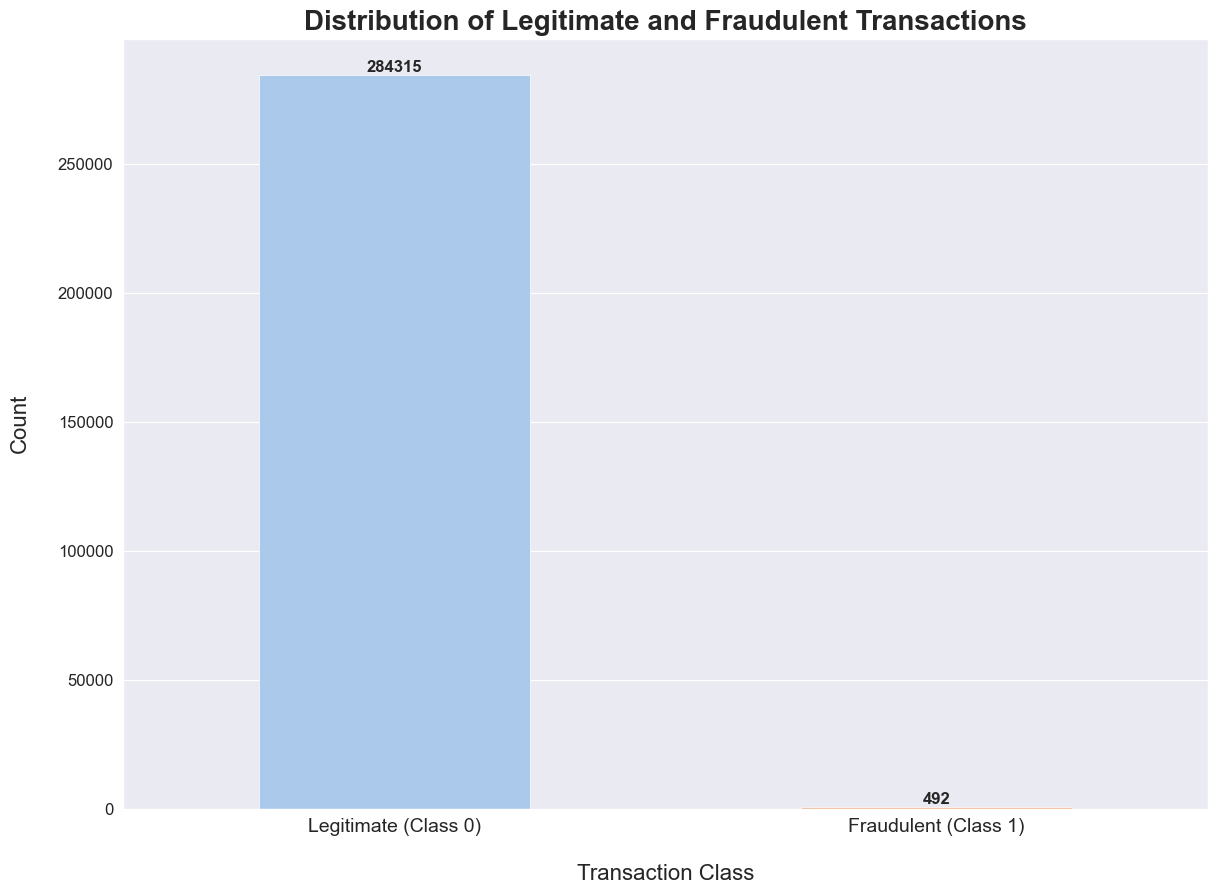

In [27]:
plt.figure(figsize=(14, 10))

# Set the graph
plt.rcParams['font.family'] = 'arial'

# Simple count plot (no hue, no legend arg)
ax = sns.countplot(x='Class', data=data, palette='pastel', width=0.5)

plt.title('Distribution of Legitimate and Fraudulent Transactions', fontsize=20, weight='bold')
plt.xlabel('Transaction Class', fontsize=16, labelpad=20)
plt.ylabel('Count', fontsize=16, labelpad=20)
plt.xticks([0, 1], ['Legitimate (Class 0)', 'Fraudulent (Class 1)'], fontsize=14)
plt.yticks(fontsize=12)

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, weight='bold')

plt.show()

The dataset contains 284,315 legitimate transactions (Class 0) and 492 fraudulent transactions (Class 1), meaning fraud represents just 0.172% of all records, and this analysis is limited by the severe class imbalance, the reduced interpretability caused by anonymized features, and the fact that the data comes from a single region and time period, which may restrict the model’s ability to generalize.

## **2.2. Amount by Class**

In [28]:
#Comparing Transaction Amounts

data.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


The summary shows that the mean fraudulent transaction amount is higher than that of legitimate ones, but the median for fraudulent transactions is only about 9.25, indicating a large discrepancy between the mean and median and suggesting that most fraudulent transactions involve small amounts while a few extremely large transactions pull the mean upward.

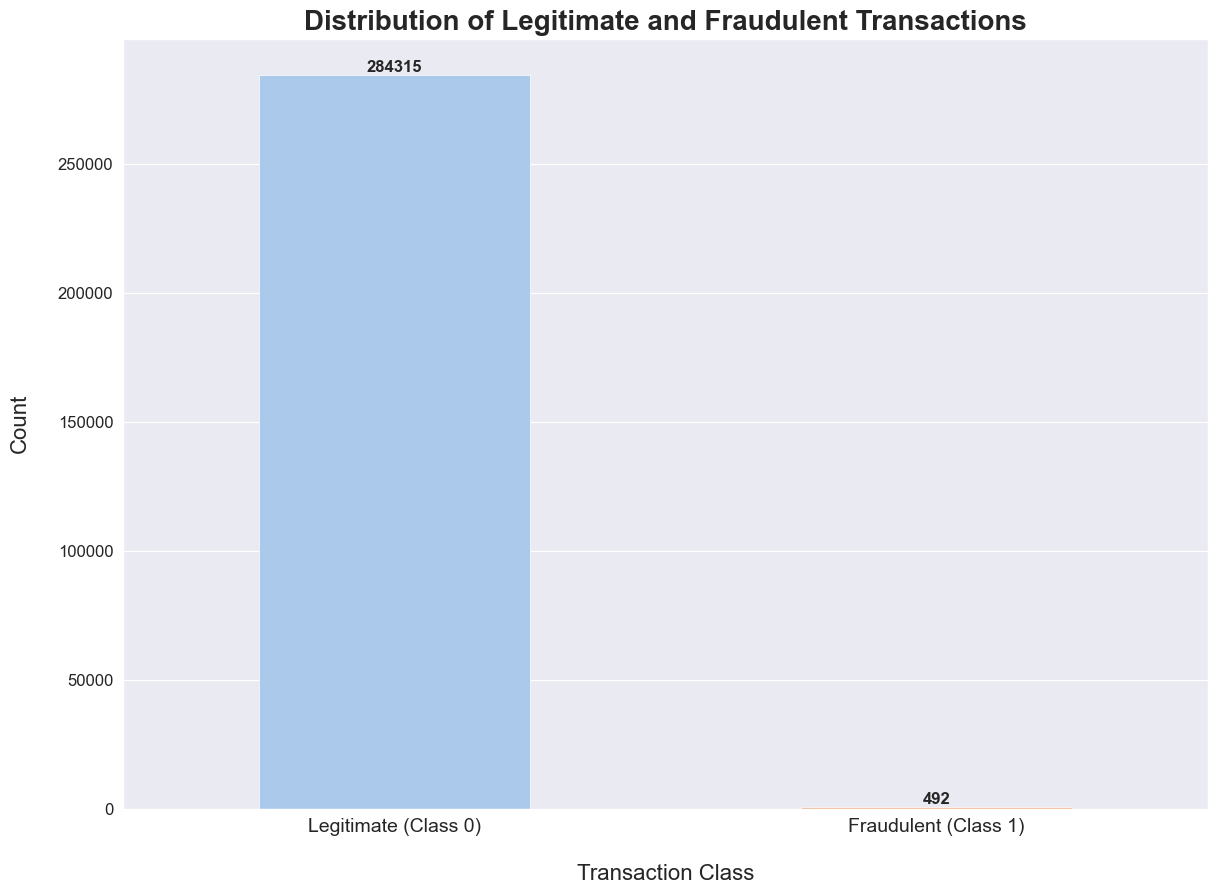

In [29]:
plt.figure(figsize=(14, 10))

# Set the graph
plt.rcParams['font.family'] = 'arial'

# Simple count plot (no hue, no legend arg)
ax = sns.countplot(x='Class', data=data, palette='pastel', width=0.5)

plt.title('Distribution of Legitimate and Fraudulent Transactions', fontsize=20, weight='bold')
plt.xlabel('Transaction Class', fontsize=16, labelpad=20)
plt.ylabel('Count', fontsize=16, labelpad=20)
plt.xticks([0, 1], ['Legitimate (Class 0)', 'Fraudulent (Class 1)'], fontsize=14)
plt.yticks(fontsize=12)

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, weight='bold')

plt.show()

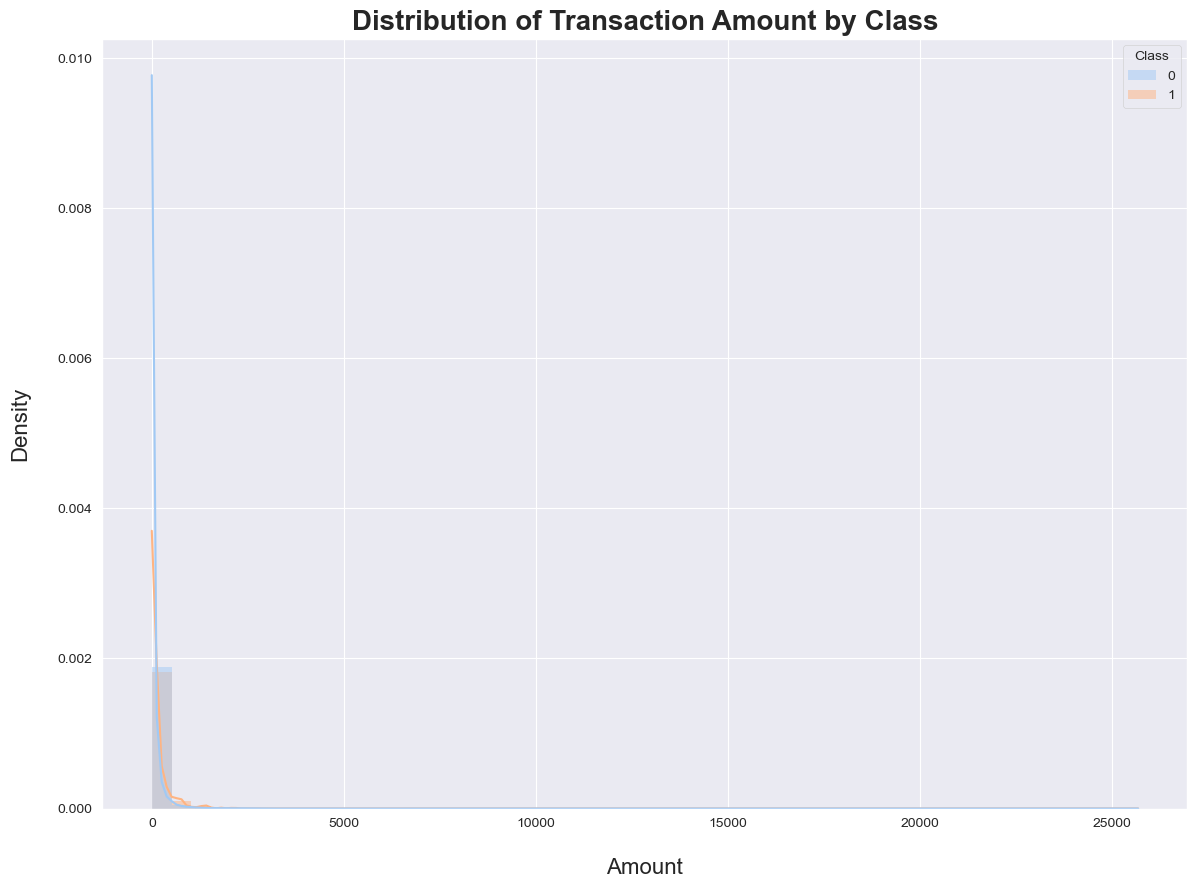

In [30]:
# Create a distribution plot for 'Amount' by 'Class'
plt.figure(figsize=(14, 10))
sns.histplot(data=data, x='Amount', hue='Class', palette='pastel', bins=50, kde=True, stat='density', common_norm=False, edgecolor='none')

#Adding Title and Lable
plt.title('Distribution of Transaction Amount by Class', fontsize=20, weight='bold')
plt.xlabel('Amount', fontsize=16, labelpad=20)
plt.ylabel('Density', fontsize=16, labelpad=20)

plt.show()

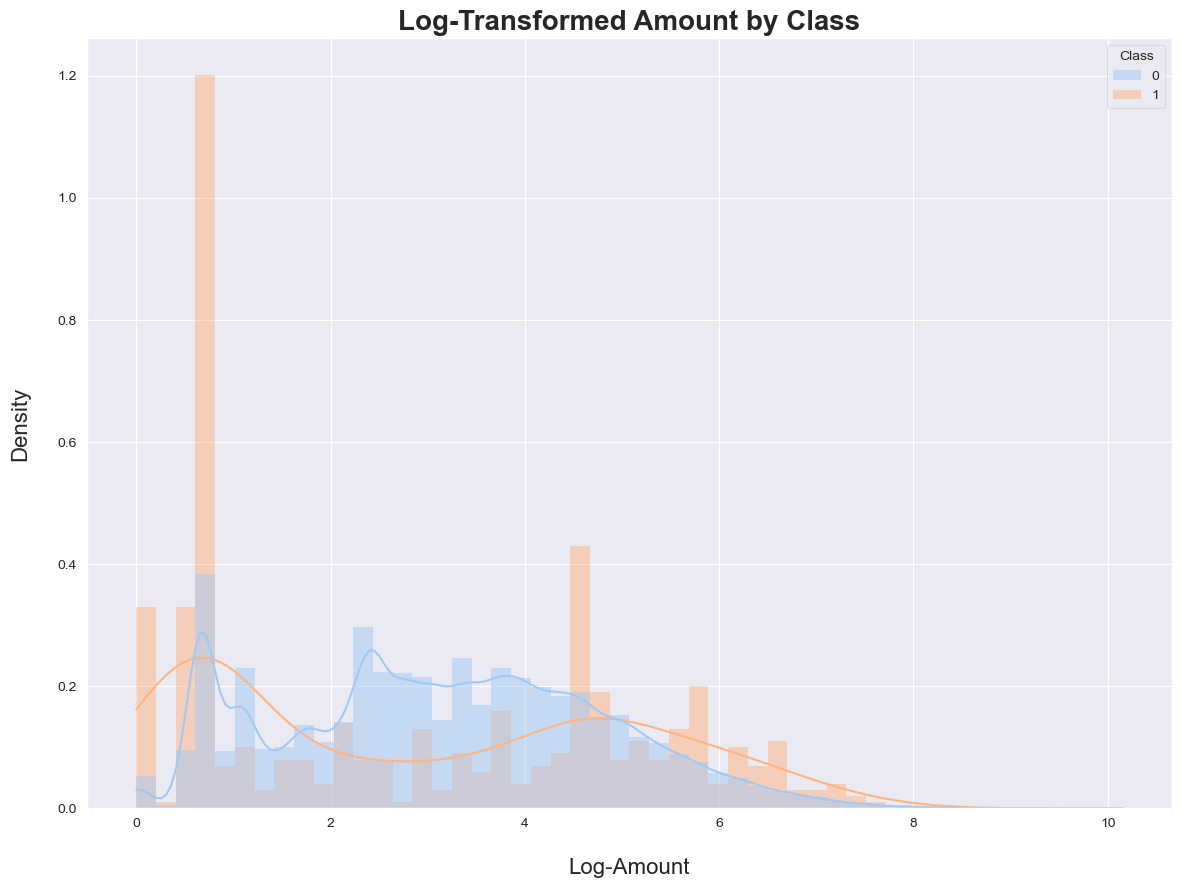

In [31]:
plt.figure(figsize=(14, 10))

#Log Transformation
data['LogAmount'] = np.log1p(data['Amount'])  # log(Amount + 1) to handle zeros
sns.histplot(data=data, x='LogAmount', hue='Class', palette='pastel', bins=50, kde=True, stat='density', common_norm=False, edgecolor='none')

#Adding Title and Lable
plt.title('Log-Transformed Amount by Class', fontsize=20, weight='bold')
plt.xlabel('Log-Amount', fontsize=16, labelpad=20)
plt.ylabel('Density', fontsize=16, labelpad=20)

plt.show()

Due to the wide range of the “Amount” feature, both the boxplot and histogram use a logarithmic scale for clearer visualization, and the boxplot shows that legitimate transactions have a stable and narrow interquartile range (IQR), indicating consistent and predictable spending patterns, while fraudulent transactions have a much wider IQR ranging from around 1 to over 100, reflecting inconsistent and random behaviour in transaction value; the histogram further supports this by showing an irregular distribution for fraudulent transactions, with many small-amount transactions and several spikes at high amounts, suggesting a strategy of testing card validity with small charges before attempting larger transactions to maximize profit prior to card blockage.

## **2.3. Time by Class**

In [32]:
#Comparing Transactions Time

data.groupby('Class')['Time'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,94838.202258,47484.015786,0.0,54230.0,84711.0,139333.0,172792.0
1,492.0,80746.806911,47835.365138,406.0,41241.5,75568.5,128483.0,170348.0


An analysis of the “Time” feature shows that the mean time for fraudulent transactions is lower than that of legitimate ones, indicating that fraudulent activity tends to occur earlier in the two-day observation period, and this pattern is reinforced by the median values, with half of all fraudulent transactions occurring before second 75,568.50, while half of the legitimate transactions occur later, around second 84,711.

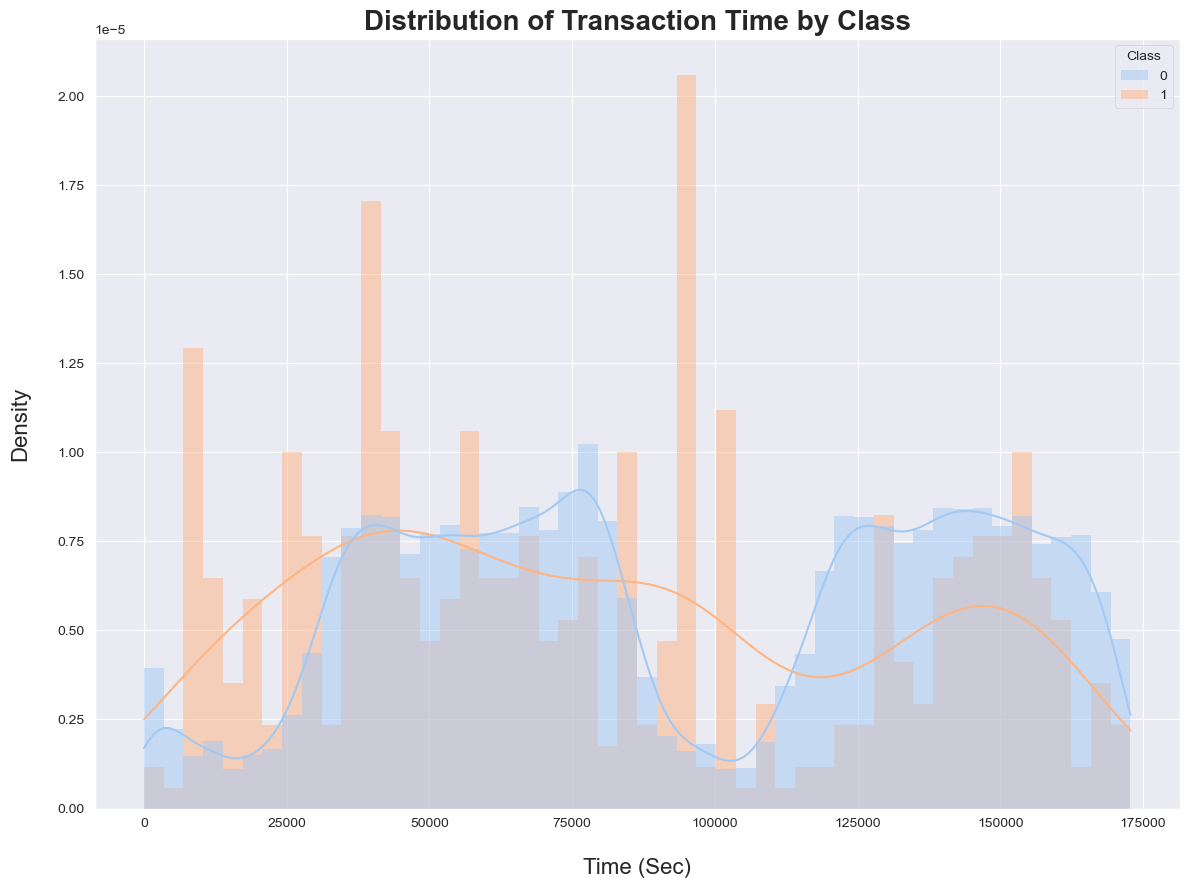

In [33]:
plt.figure(figsize=(14, 10))

#Histogram
sns.histplot(data=data, x='Time', hue='Class', bins=50, kde=True, stat='density', common_norm=False, palette='pastel', edgecolor='none')

#Adding Title and Lable
plt.title('Distribution of Transaction Time by Class', fontsize=20, weight='bold')
plt.xlabel('Time (Sec)', fontsize=16, labelpad=20)
plt.ylabel('Density', fontsize=16, labelpad=20)

plt.show()

Legitimate transactions appear to follow a stable pattern with high activity during daylight hours, whereas fraudulent transactions show a more random and inversely distributed pattern, and to properly analyse this daily cycle, the “Time” feature must be converted to represent the hour of the day to capture the cyclical nature of human behaviour.

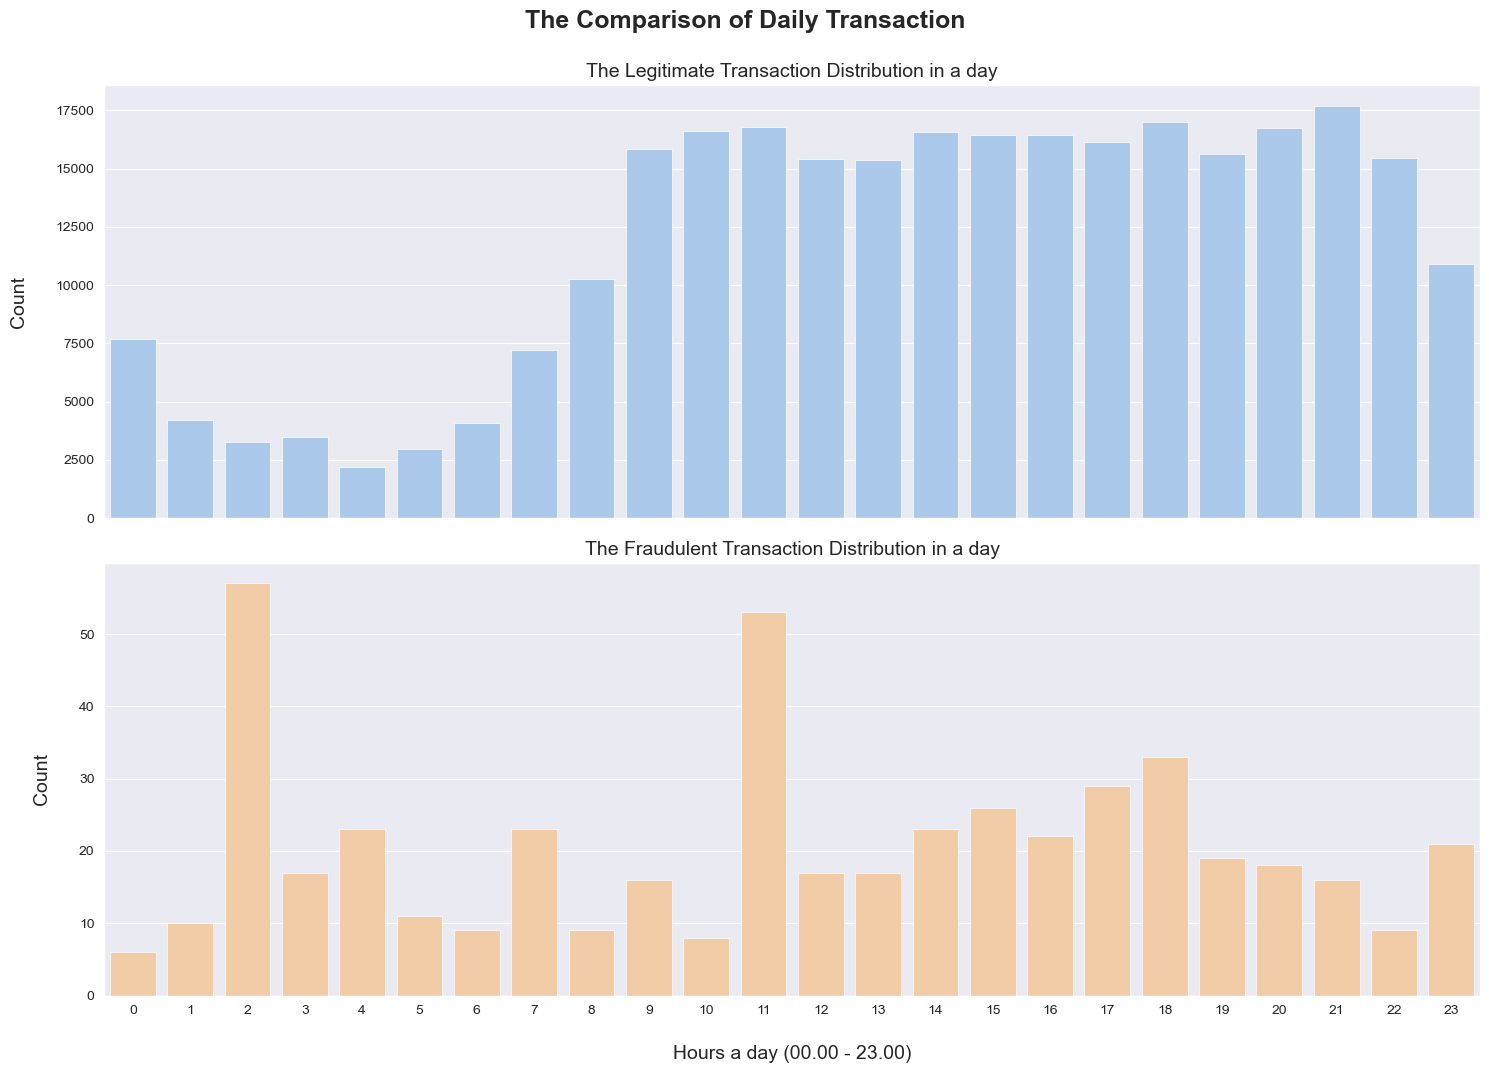

In [35]:
#Daily Transaction Comparison

# Calculate seconds in 24 hours (86400 seconds = 24 hours)
seconds_in_day = data['Time'] % 86400
data['Hour_of_Day'] = (seconds_in_day // 3600).astype(int)

#Data Visualization
#Divide graph for 0 and 1
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)
#Plot for legitimate transactions (0)
sns.countplot(x='Hour_of_Day', data=data[data['Class'] == 0], ax=ax1, color='#a1c9f4')
ax1.set_title('The Legitimate Transaction Distribution in a day', fontsize=14)
ax1.set_ylabel('Count', fontsize=14, labelpad=20)
ax1.set_xlabel('')
#Plot for Fraudulent transactions (1)
sns.countplot(x='Hour_of_Day', data=data[data['Class'] == 1], ax=ax2, color='#FFCC99')
ax2.set_title('The Fraudulent Transaction Distribution in a day', fontsize=14)
ax2.set_xlabel('Hours a day (00.00 - 23.00)', fontsize=14, labelpad=20)
ax2.set_ylabel('Count', fontsize=14, labelpad=20)
#Adding Title and lable
plt.suptitle('The Comparison of Daily Transaction', fontsize=18, y=0.92, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.92])

plt.show()

Due to the wide range of the “Amount” feature, both the boxplot and histogram use a logarithmic scale for clearer visualization, and the boxplot shows that legitimate transactions have a stable and narrow interquartile range (IQR), indicating consistent and predictable spending patterns, while fraudulent transactions have a much wider IQR ranging from about 1 to over 100, reflecting inconsistent and random behaviour in transaction value; the histogram further supports this by showing an irregular distribution for fraudulent transactions, with many small-amount transactions and several spikes at high amounts, suggesting a strategy in which fraudsters test card validity with small charges before attempting larger transactions to maximize profit before the card is blocked. An analysis of the “Time” feature shows that the mean fraudulent transaction time is lower than that of legitimate ones, indicating that fraudulent activity tends to occur earlier in the two-day period, and this is confirmed by the median values, with half of all fraudulent transactions occurring before second 75,568.50 while legitimate transactions reach their median later at second 84,711. Further inspection of the time distribution shows that legitimate transactions follow a stable daily pattern with higher activity during daylight hours, whereas fraudulent transactions display a more random and inverse pattern, making it necessary to convert the “Time” feature into hour-of-day format to properly capture human behavioural cycles; after doing so, the results show a noticeable concentration of fraudulent activity around 02:00 AM when human activity is low, but fraud also appears during peak periods such as 11:00 AM and the afternoon, indicating that hour-of-day is not a reliable standalone feature for detecting fraud because fraudulent transactions occur during both busy and quiet periods.

## **2.3. PCA Variables**

In [ ]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,30))
## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0,);
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);


As can see, some of our predictors do seem to be correlated with the Class variable. Nonetheless, there seem to be relatively little significant correlations for such a big number of variables. This can probably be attributed to two factors:

- The data was prepared using a PCA, therefore our predictors are principal components.
- The huge class imbalance might distort the importance of certain correlations with regards to our class variable.

Because the correlation between variables and 'Class' are so small, the project choosed significant variables are the ones that have correlations with ‘Class’ ≥ 0.1.

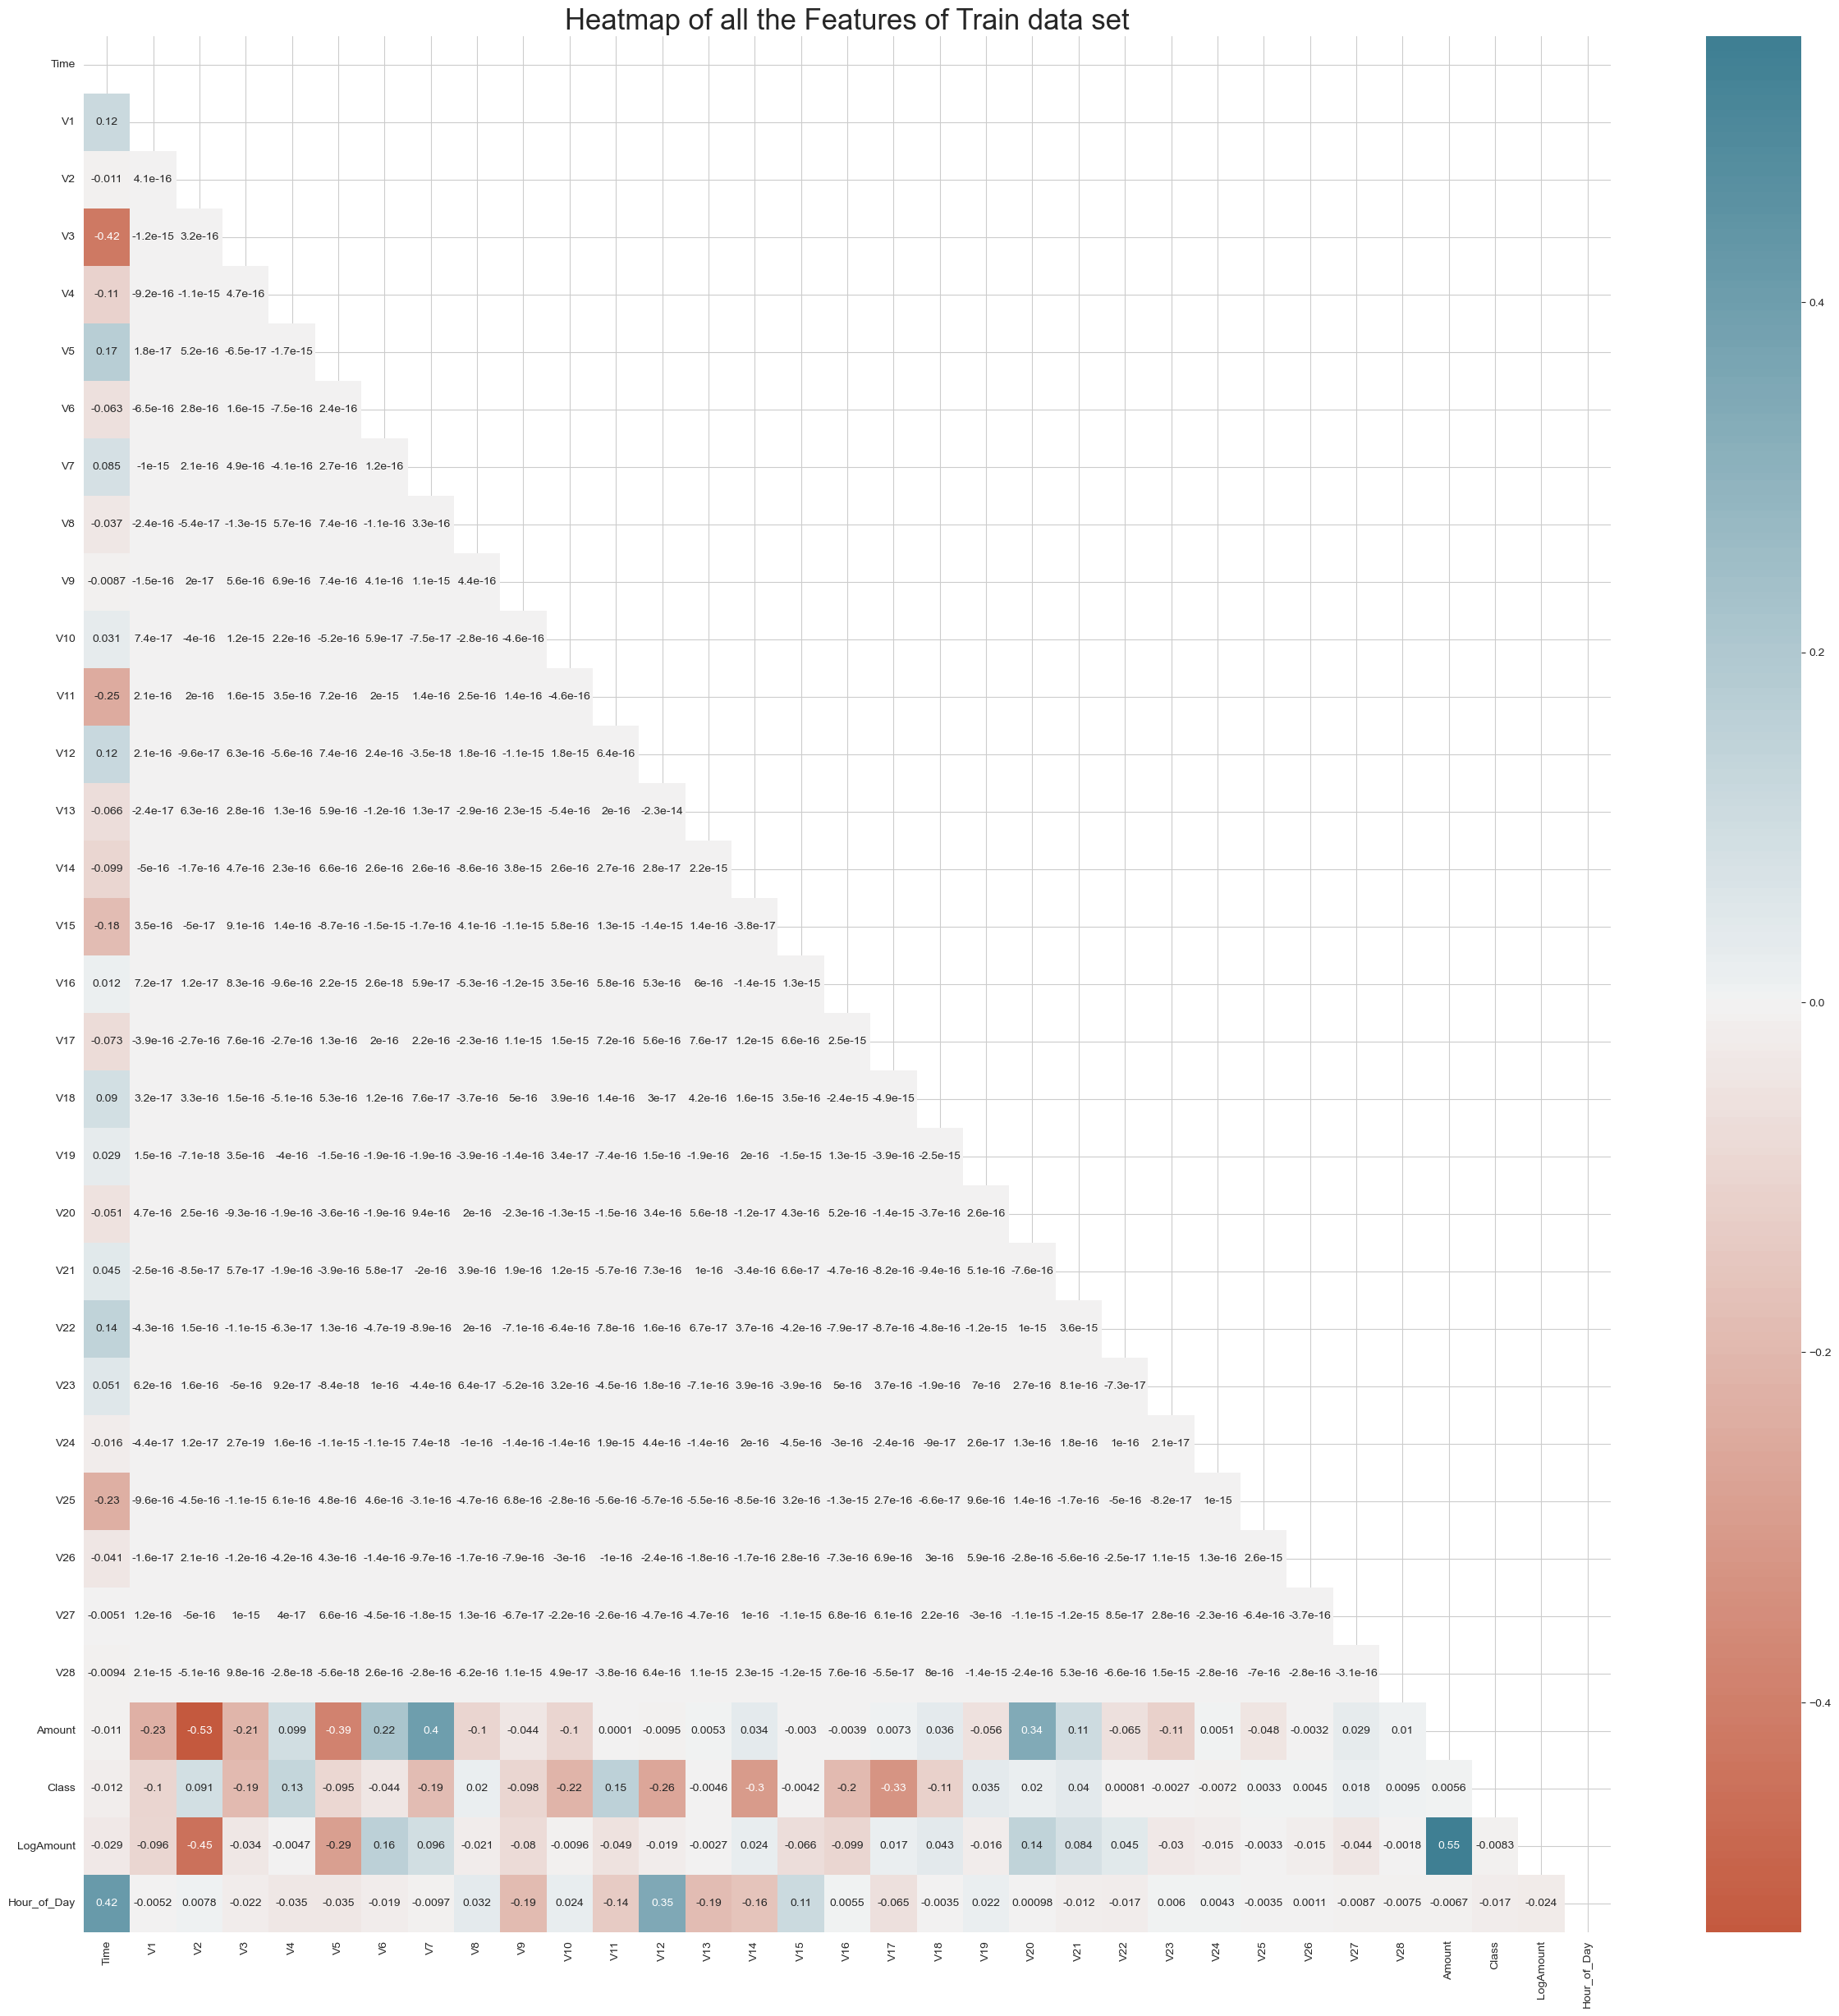

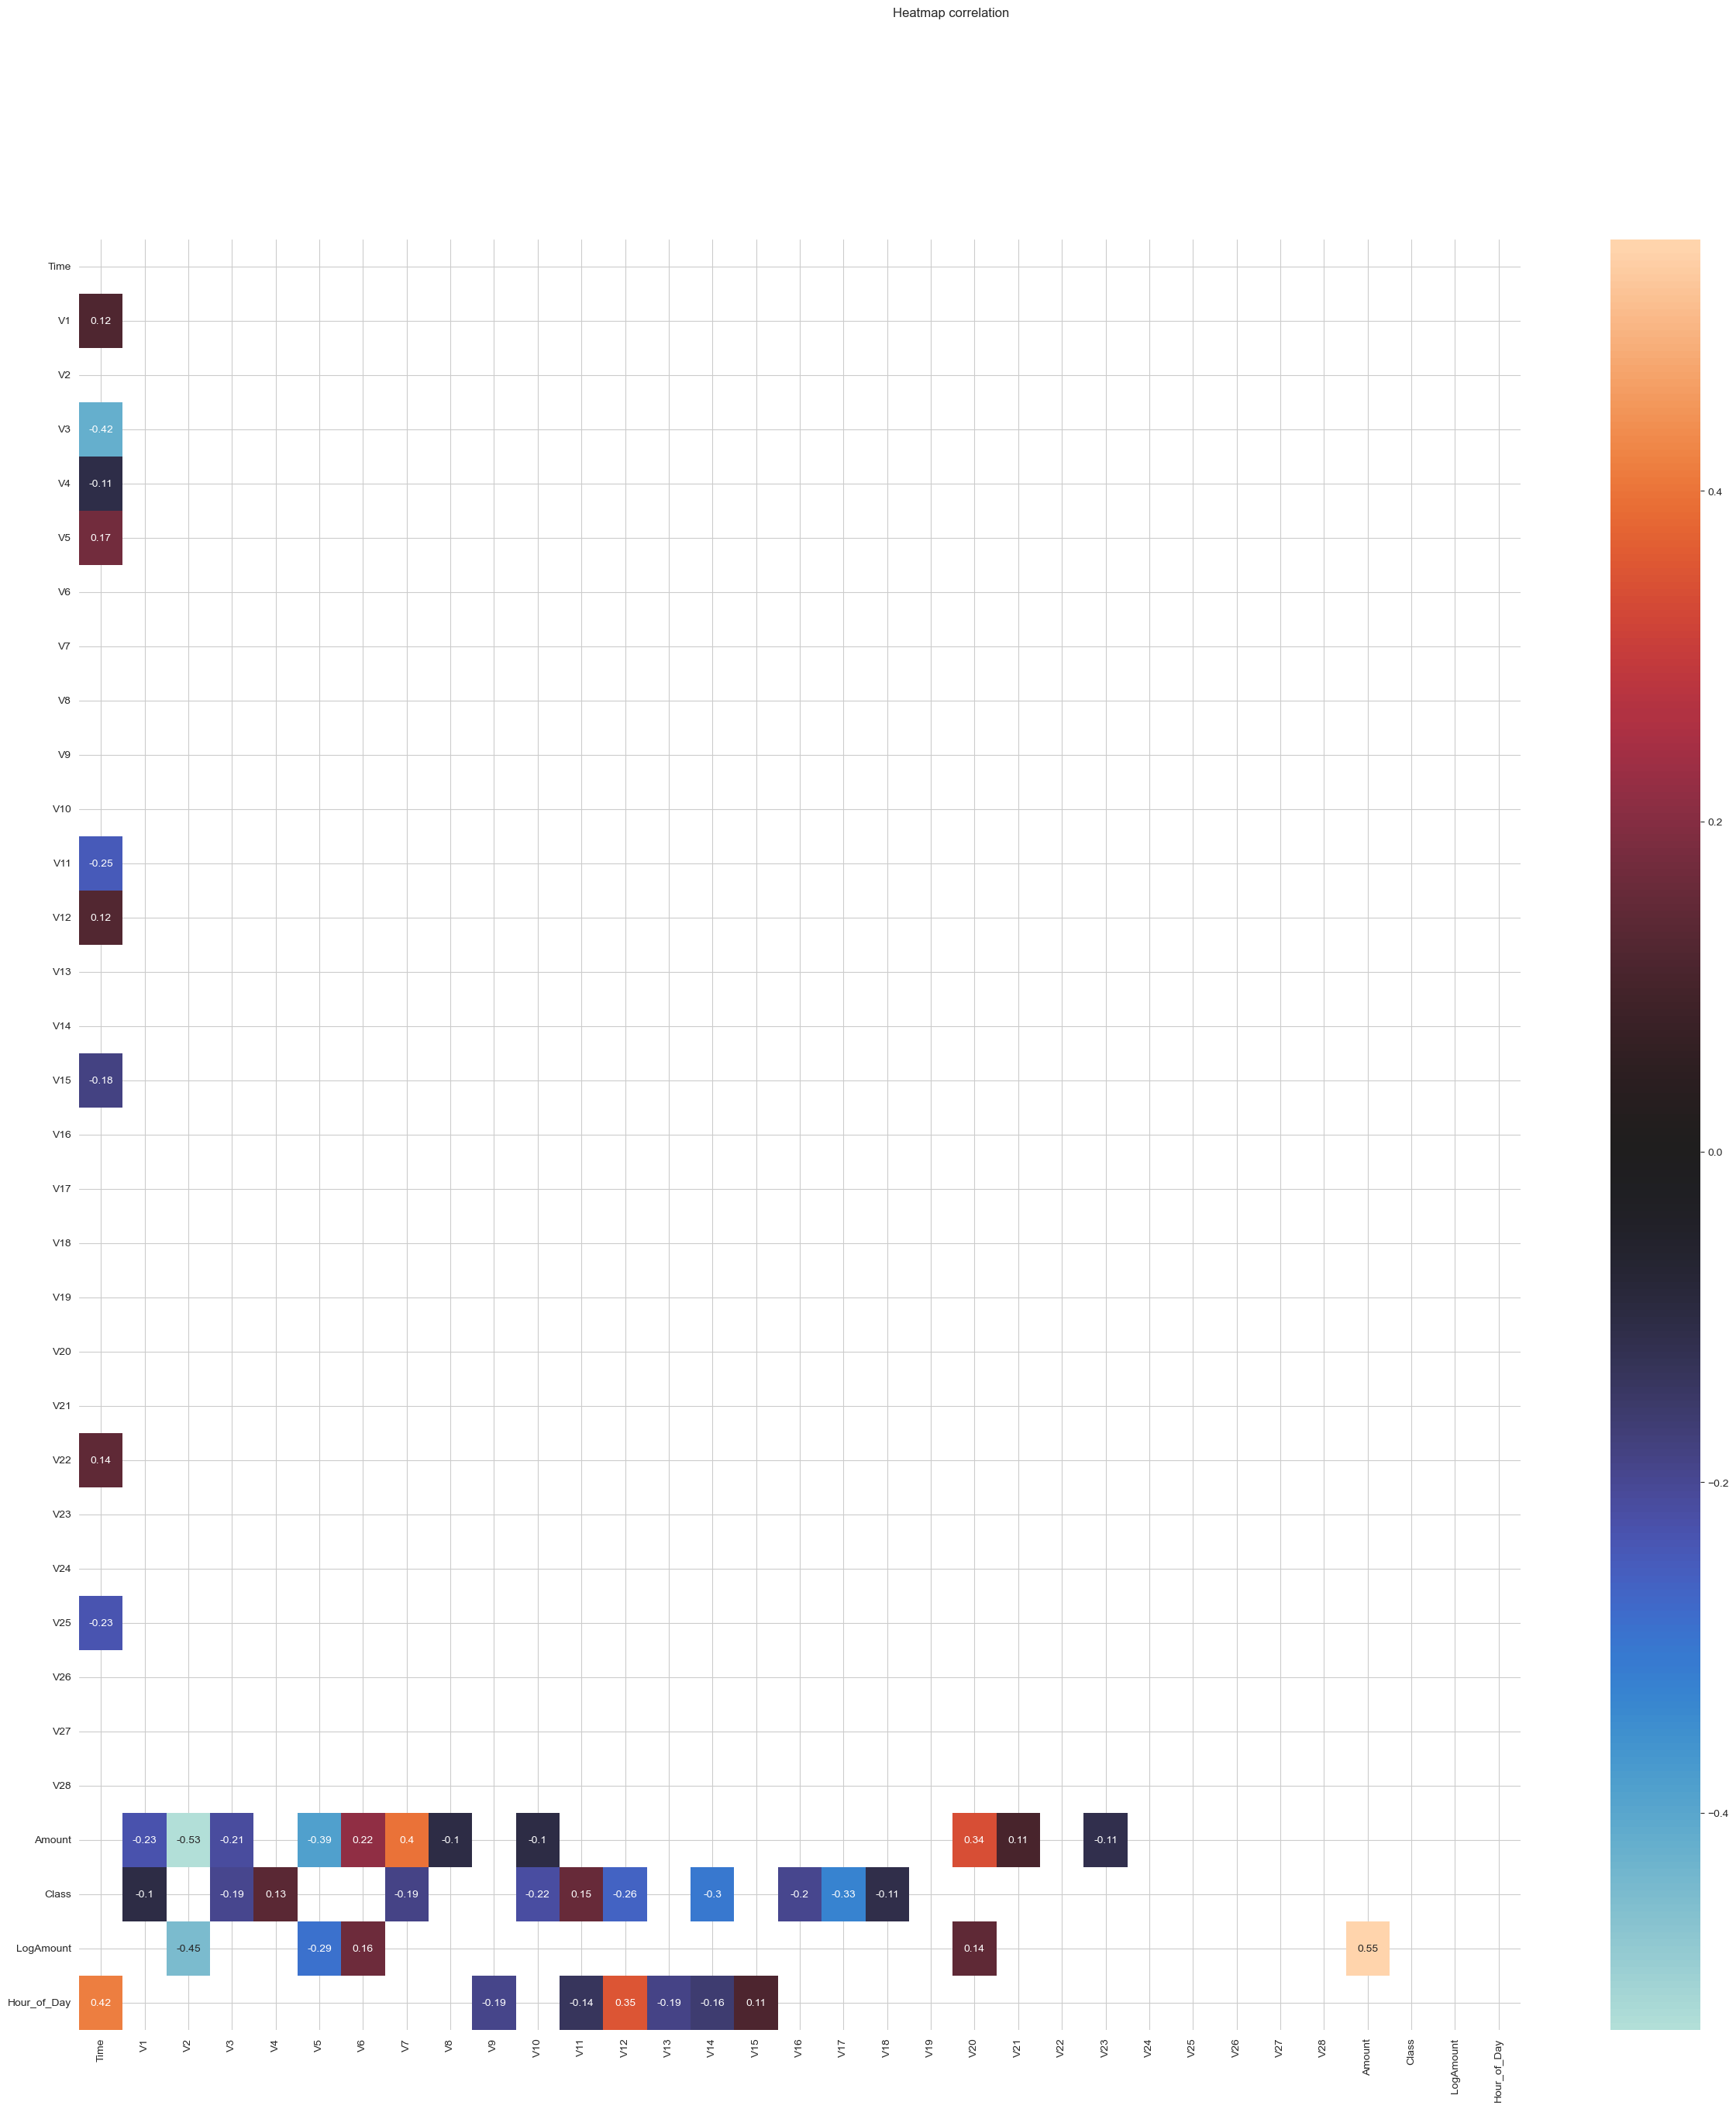

In [ ]:
corr = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap((corr[(corr>=0.1) |(corr <=-0.1)]), mask=np.triu(corr),annot=True,center = 0,cmap="icefire")
plt.suptitle('Heatmap correlation')
plt.show()

We can see that V17 and V14 are the two variables that most related to the Class with the absolute correlations ≥ 0.3. Other important features are V1, V3, V4, V7, V10, V11, V12, V14, V16. V17, V18.

These findings suggest that simple linear models or static rule-based systems will likely be ineffective. Hence, the use of advanced, non-linear machine learning algorithms is essential.

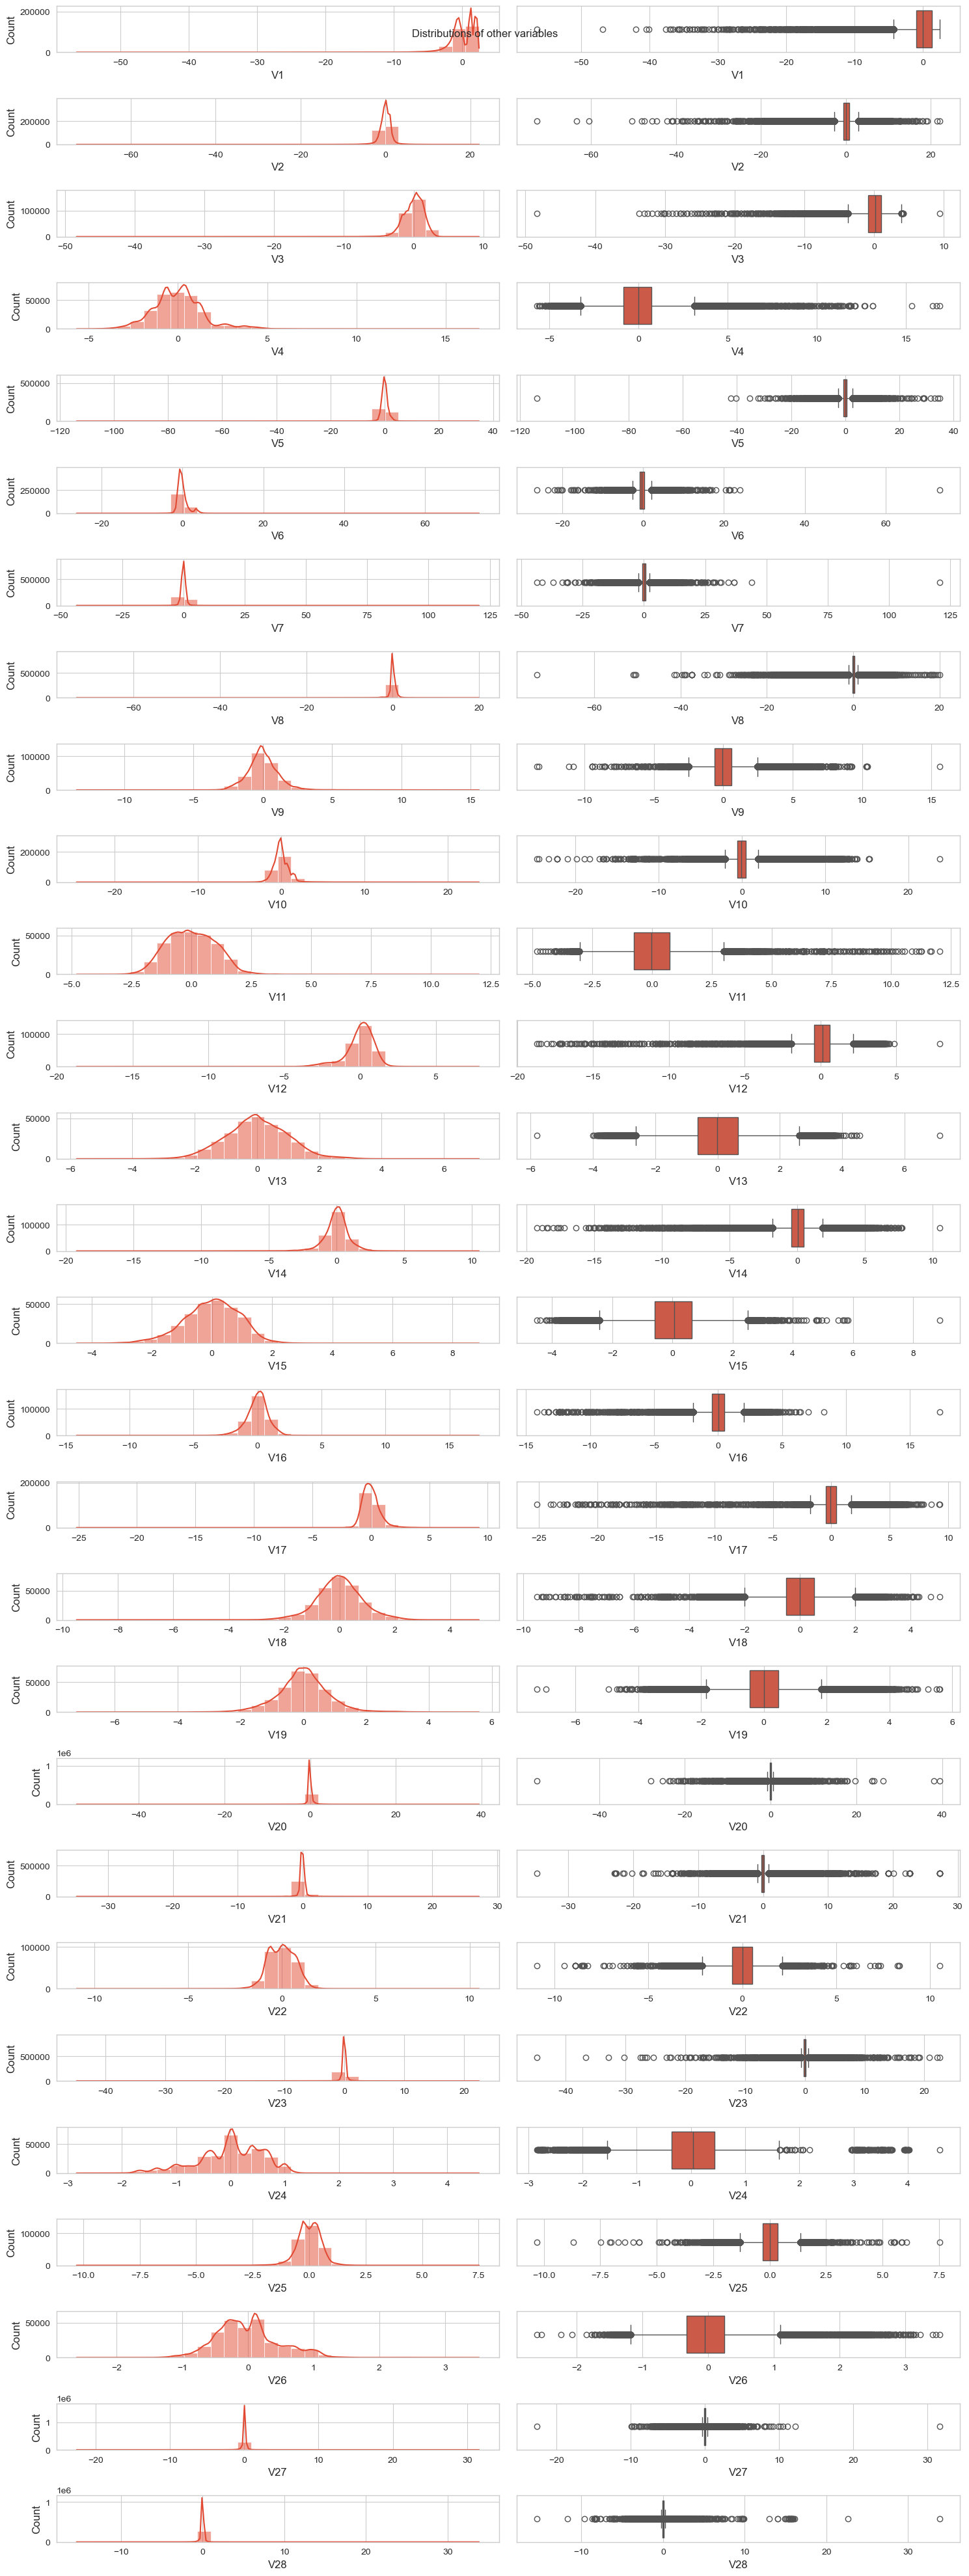

In [ ]:
nrows, ncols = len(data.columns[1:29]), 2
fig, ax = plt.subplots(nrows, ncols, figsize = (15, 40))

for idx, col in enumerate(data.columns[1:29]):

    plt.subplot(nrows, ncols, ncols*idx+1)
    sns.histplot(data = data, x = col, bins = 30, kde = True)

    plt.subplot(nrows, ncols, ncols*idx+2)
    sns.boxplot(data = data, x = col, orient = True)

plt.suptitle('Distributions of other variables')
fig.tight_layout()
plt.show()

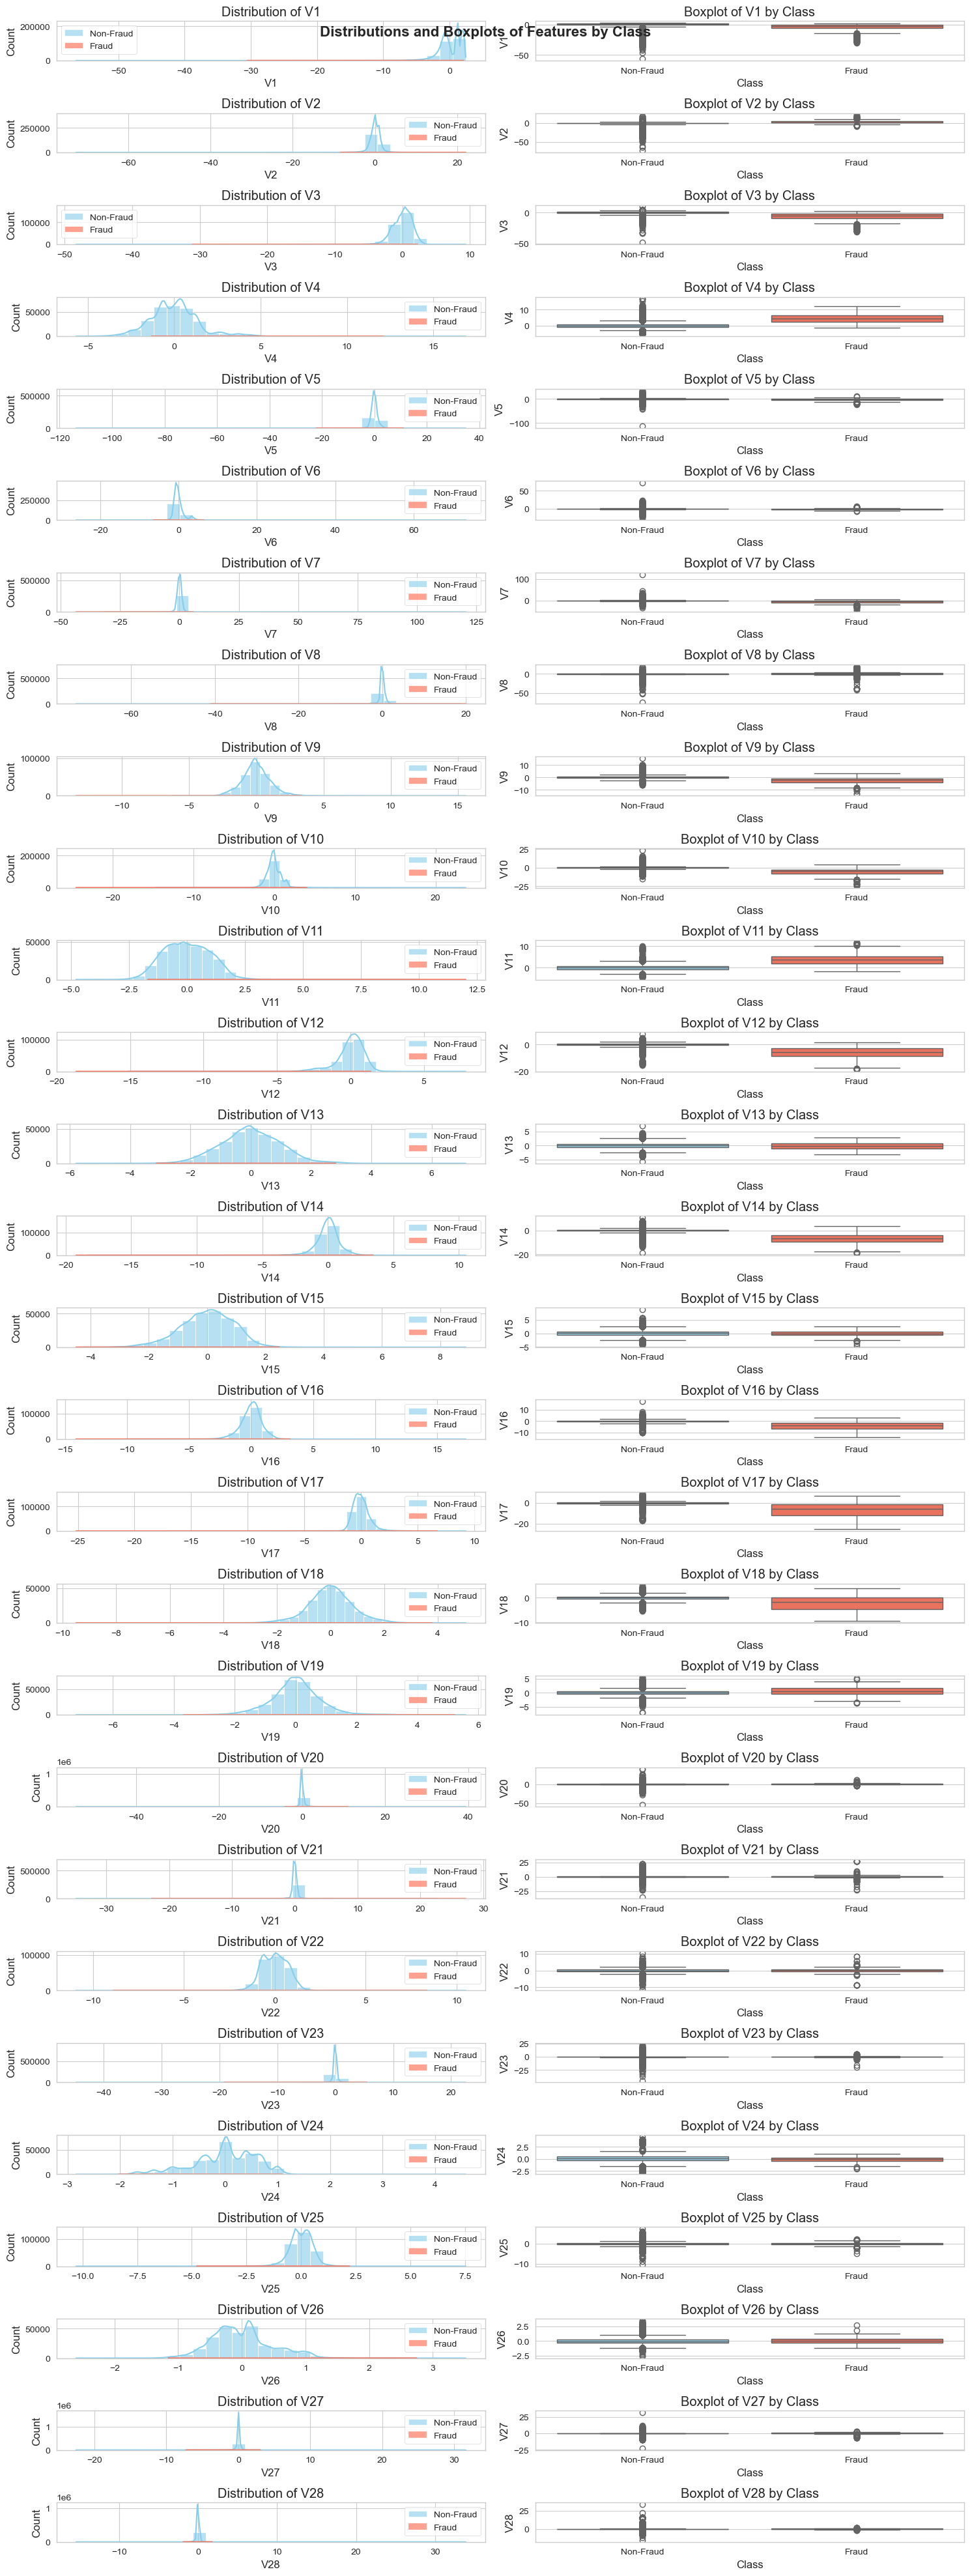

In [ ]:
# Target'Class' column: 0 = non-fraud, 1 = fraud
nrows, ncols = len(data.columns[1:29]), 2
fig, ax = plt.subplots(nrows, ncols, figsize=(15, 40))

for idx, col in enumerate(data.columns[1:29]):
    # Histogram with separate lines for Fraud and Non-Fraud
    plt.subplot(nrows, ncols, ncols*idx + 1)
    sns.histplot(data[data['Class'] == 0][col], bins=30, kde=True, color='skyblue', label='Non-Fraud', alpha=0.6)
    sns.histplot(data[data['Class'] == 1][col], bins=30, kde=True, color='tomato', label='Fraud', alpha=0.6)
    plt.legend()
    plt.title(f'Distribution of {col}')

    # Boxplot (optional: can also split by class)
    plt.subplot(nrows, ncols, ncols*idx + 2)
    sns.boxplot(data=data, x='Class', y=col, palette=['skyblue', 'tomato'])
    plt.title(f'Boxplot of {col} by Class')
    plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

plt.suptitle('Distributions and Boxplots of Features by Class', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

The correlation analysis shows that no features are strongly correlated with fraud (|r| ≥ 0.5), with only 11 out of 30 features reaching an absolute correlation of at least 0.1, and both the “Amount” and “Time” features display very weak correlations to fraud (0.0056 and –0.0123), making them unsuitable as standalone fraud indicators; the “V” features exhibit moderate correlations as summarized in Table 4, suggesting that fraud is influenced not by simple linear relationships but by complex multivariate patterns, and because the features are not normally distributed and fraudulent values often appear in different ranges or in the tails of the distributions—frequently falling outside the central quartile range in the boxplots—simple linear or rule-based models are unlikely to perform well, meaning that advanced, non-linear machine learning algorithms are necessary for effective fraud detection.

## **2.4. EDA Conclusion**

Data description and exploratory analysis bring up several notable findings that may offer valuable insights for financial institutions and regulators in credit fraud detection. In this part of the project, recommendations are provided based on key findings from Exploratory Data Analysis (EDA) and our understanding of the emerging transaction risk management context. 

The Need for an Effective Fraud Detection Model 

First, analysis of the ‘Amount’ variable indicates that fraudulent transactions span a wide monetary range, demonstrating that fraud cannot be reliably identified based solely on transaction value. Failure to detect fraud can lead to direct financial losses, erosion of customer trust, and potential reputational damage. In addition, since the number of fraudulent transactions accounts for a small proportion in real life, systems are inherently vulnerable to high false positive rates. Excessive false positives not only increase operational costs but also introduce unnecessary customer friction and service disruptions. Consequently, models in use must be aligned to the organization’s risk policies, where some prioritize high recall and some focus more on precision.  

Explore and improve monitoring tools with frequently observed features 

Second, the analysis results often reveal that fraudulent transactions are characterized by specific timing, such as late-night hours or during flash sales, and involve multiple small-value purchases. In practice, without the PCA transformation for confidence, financial institutions can use different techniques to analyse and explore more common behavioral patterns in fraudulent transactions. As these patterns are identified, we can use them to dynamically adjust different risk management tools to flag potential violations better, and these systems can be significantly improved by incorporating identified fraud patterns. A relevant best-practice example is provided by PSU Bank, which previously faced operational risks and fraud, resulting in inadequate payment monitoring and an inability to handle high transaction volumes. To address this challenge, they mitigate issues by implementing real-time transaction monitoring, using predefined and customizable rules based on internal practices, industry norms, and threshold activities. Artificial intelligence and machine learning’s integration in the model contributes to the model’s cognitive intelligence, improving the detection performance (BANKIQ, 2024) 

Machine learning application for fraud detection 

Thirdly, our correlation analysis reveals that fraud trends are not a linear function but rather require more complex analysis. Thus, integrating advanced machine learning techniques, such as Random Forest and XGBoost, it would be possible to analyse the model decision-making process to infer which underlying transaction important features and characteristics (e.g., amount, location, velocity) are primarily responsible for a high-risk score. This diagnostic capability is essential for analysts to understand the risk and effectively capture the complex fraudulent transactions. In real-world financial systems, machine learning algorithms such as Random Forest and Autoencoders can also be effectively deployed in real-time payment monitoring to enhance fraud detection capabilities. These models generate probabilistic risk scores for each transaction, enabling the system to prioritise potentially high-risk activities. Based on these scores, the payment system can automatically determine the appropriate action, such as auto-approval, auto-decline, or manual review (potentially with OTP/ID verification). This automated process is crucial for mitigating pre-loss risks and reducing customer churn. In practice, machine learning is applied in various banking models, especially real-time transaction monitoring and Anti-Money Laundering (AML) Alert Scoring. A case study from Datarobot (2025) showed that it transforms the AML system from rule-based to adaptive by creating machine learning models, which can reduce the number of false positive cases, decrease operational costs by costs per alert, and use a conservative threshold to help maintain the rate of false negatives at 0%. (Datarobot, 2025) 

Continuous System Adaptation 

The nature of fraudulent patterns is continuously evolving, which necessitates continuous updates and adjustments to the payment monitoring system. A regular process (e.g., monthly) should be established to monitor the latest payment transaction data and enhance the overall system with this information. This proactive approach ensures the system can be developed to detect new fraud techniques effectively, maintaining a high level of recall and system accuracy. According to Comptroller, effective model validation and data management help managing and improving the model. These practices can make it easier to adjust historical data and put them to analysis to detect further potential risk. The validation process focuses on checking the system, showing the outcome analysis, and improving performance. These processes need to be conducted regularly, at least annually, to ensure that the model remains updated and accurate for detection purposes. (Comptroller, 2025) 